### 1. we classify 2000 email in two groups: 1000 emails as spam and 1000 emails as non-spam. 210 of the spam emails contained the phrase This isn’t spam, 99 had the word prize and 110 the word prince. Of the 99 that contained the word prize, 79 also contained the word prince. On the other hand, of the 1000 non-spam emails, only 23 had the phrase this isn’t spam, 80 the word prize and 110 the word prince. Of the 80 that contained the word prize 8 also contained the word prince.

<br>
<font color=blue>Assuming that the a priori probability of any message being spam is 0.5, what is the probability that an email is spam given it contains the phrase This isn't spam</font>

Hint: Bayes Theorem of the form:

$$Pr[ K | C ] = \frac{ \Pr[ C | K] \Pr[K] }{ \Pr[ C | K ] \Pr[ K ] +
               \Pr[ C | K^c ] \Pr[ K^c ] } $$

##### P(spam) = 0.5; P(non-spam) = 0.5

In [1]:
Pspam = 0.5
PnotSpam = 0.5
PphraseSpam = 210/1000
PphraseNotSpam = 23/1000
Pphrase = PphraseSpam+PphraseNotSpam

PspamGivenPhrase = (PphraseSpam*Pspam)/((PphraseSpam*Pspam)+(PphraseNotSpam*PnotSpam))
cat(sprintf("The probability that an email is spam given it says that it's not is: %f",PspamGivenPhrase))

The probability that an email is spam given it says that it's not is: 0.901288

### 2. From the Cleveland Heart Disease dataset (attached to this folder - [ https://archive.ics.uci.edu/ml/datasets/Heart+Disease ] ) if we pick 25 patients randomly, find the probability that at least 3 have less than 50 percent diameter narrowing (num variable 14 in dataset state 0)

<br>
<font color=blue>Answer this question using one of the distributions seen in class without using the R functions, but by showing the calculations worked by hand. You can always confirm the answer with the R function</font>

In [2]:
clev_header = c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","narrowing")  
cleveland <- read.csv("cleveland.csv",header = FALSE)
colnames(cleveland) = clev_header
count_low_narrowing <- sum(cleveland$narrowing == 0)
num_patients <- length(cleveland$age)

historical_prob_low_narrowing <- count_low_narrowing/num_patients
historical_prob_narrowing <- 1-historical_prob_low_narrowing

# finding at least 3 with low narrowing is same as finding 1-probability(3 or fewer have low narrowing)
# using a hypergeometric - sampling without replacement 
K = count_low_narrowing
N = num_patients
k = 1:3
n = 25
Hprob_1to3 = (choose(K,k)*choose(N-K,n-k))/choose(N,n)
Hprob_1to3 = 1-sum(Hprob_1to3)
Hprob_1to3


[1] 0.9999932

### 3. From the Cleveland Heart Disease dataset assume that patients are examined at random what is the average number of patients before the first patient with cholesterol levels above than 300 is encountered?

<br>
<font color=blue>Answer this question using one of the distributions seen in class without using the R functions, but by showing the calculations worked by hand. You can always confirm the answer with the R function</font>

In [3]:
count_greater300 = sum(cleveland$chol > 300)
historical_p_greater300 = count_greater300/num_patients

# using a geometric distribution to determine number of selections needed
avg_num = 1/historical_p_greater300
pat_before = floor(avg_num)

cat(sprintf("Average number of patients before one with cholesterol above 300 is selected: %f \nor - since partial patients aren't a thing: %s",avg_num,pat_before))

Average number of patients before one with cholesterol above 300 is selected: 6.886364 
or - since partial patients aren't a thing: 6

### 4. From the Cleveland Heart Disease dataset create a contingency table that tabulates the relationship between chest pain and the diagnosis of heart disease?

<br>
<font color=blue>
1. Calculate the marginal probability of a diagnosis of a vessel diameter narrowing larger than 50%<br>
2. Calculate the joint probability of atypical angina and a vessel diameter narrowing larger than 50%<br>
3. What is the probability of a diagnosis of 1 given that the patient has a typical angina?<br>
4. If a patient has asymptomatic angina what is the probability of a diagnosis of 0 (diameter narrowing less than 50%), what is the probability of a diagnosis of 1? <br></font>

<br>
<font color=blue> Generate the contingency table using the R code as seen in class</font>


In [4]:
table(cleveland$exang,cleveland$narrowing)

# making it read better
cleveland2 <- data.frame(cleveland)
for(k in 1:num_patients){
    if(cleveland$exang[k] == 1){
        cleveland2$exang[k] = "Angina Present"
    } else{
        cleveland2$exang[k] = "No Angina"
    }
    if(cleveland$narrowing[k] >= 1){
        cleveland2$narrowing[k] = "More than 50% narrowing"
    } else{
        cleveland2$narrowing[k] = "Less than 50% narrowing"
    }
}

clev_table = addmargins(table(cleveland2$exang,cleveland2$narrowing))
clev_table

   
      0   1   2   3   4
  0 141  30  14  12   7
  1  23  25  22  23   6

,Less than 50% narrowing,More than 50% narrowing,Sum
Angina Present,23,76,99
No Angina,141,63,204
Sum,164,139,303


In [5]:
# 1 - marginal probability of a diagnosis of a vessel diameter greater than 50%
pat_greater50 = clev_table[3,2]
total_pat = clev_table[3,3]
p1 = pat_greater50/total_pat
cat(sprintf("Marginal Probability of a diagnosis of vessel narrowing greater than 50 percent = %f\n",p1))
# 2 - joint probability of atypical angina and > 50% narrowing
angina_greater = clev_table[1,2]
p2 = angina_greater/total_pat
cat(sprintf("\nJoint Probability of atypical angina and greater than 50 percent narrowing = %f\n",p2))
# 3 - probability of > 50% narrowing given atypical angina
p3a = angina_greater/clev_table[3,2]
p3b = clev_table[1,1]/clev_table[3,1]
p3 = (p1*p3a)/((p1*p3a)+(p3b*(1-p1)))
# alternative 
p3alt = clev_table[1,2]/clev_table[1,3]
cat(sprintf("\nProbability of greater than 50 percent narrowing give atypical angina = %f\n",p3))
cat(sprintf("Both versions of calculation give the same probability: %f = %f\n",p3,p3alt))
# 4 - given no angina, what are probability of < 50% and >50% narrowing 
p4less = clev_table[2,1]/clev_table[2,3]
p4greater = clev_table[2,2]/clev_table[2,3]
cat(sprintf("\nProbability of less than 50 percent narrowing given no angina: %f\n",p4less))
cat(sprintf("While the probability of greater than 50 percent narrowing given no angina is: %f",p4greater))

Marginal Probability of a diagnosis of vessel narrowing greater than 50 percent = 0.458746

Joint Probability of atypical angina and greater than 50 percent narrowing = 0.250825

Probability of greater than 50 percent narrowing give atypical angina = 0.767677
Both versions of calculation give the same probability: 0.767677 = 0.767677

Probability of less than 50 percent narrowing given no angina: 0.691176
While the probability of greater than 50 percent narrowing given no angina is: 0.308824

## 5. Markov Chains

1. As explained in class, create a function in R (or python) that simulates the following random walk based on the conditional probabilities from the transition graph given below (Let's define state A as state 0):

2. Once the function is created, simulate 500 random walks of 10 steps each (you choose the initial state - can be a constant or a user defined variable). 

Example of ONE random walk 2,3,2,3,4,4,4,4,4,4 (remember that 0 and 4 are absorbing states). 

3. Plot the 500 simulations.

4. Capture each one of the 500 walks last state (at step 10) and create a table of frequencies for each one of the states. it should looks something like

|State  |Count|Frequency|
|:------|:----|:--------|
|0      |100  |0.2      |
|1      |100  |0.2      |
|2      |100  |0.2      |
|3      |100  |0.2      |
|4      |100  |0.2      |
|total  |500  |1.0      |

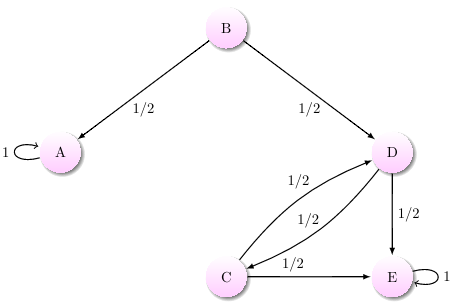

In [6]:
##This is an example of the code, but you can create the functions and the plots anyway you want (even in python)

# library(markovchain)

#1. create function that produces a random walk of size N

####Random Walk function
#N = number of steps in the walk
#Ini_prob = initial state
#P_mat = Probability matrix
Sim_Markov=function(N,Ini_prob,P_mat,initial_node) {
  #write function that generates one random walk sampling from the initial state....
    newP = Ini_prob*P_mat
    b = matrix(0,1,N)
    b[1] = initial_node
    for(k in 2:N){
        newP = newP*P_mat
        b[k] = sample(c(1:length(Ini_prob)),1,replace=T,newP[b[k-1],])
    }
    b = as.vector(b)
  return(b)
}

#2. Define the initial state Ini_prob - different examples
Ini_prob=c(0.0005,0.4,0.199,0.4,0.0005)
Ini_prob=c(0.2,0.2,0.2,0.2,0.2)
# Ini_prob=c(0,0,1,0,0)

#3. Define the transition probabilities matrix
P_mat=matrix(0,5,5)
P_mat[1,]=c(1,0,0,0,0)
P_mat[2,]=c(0.5,0,0.5,0,0)
P_mat[3,]=c(0,0,0,0.5,0.5)
P_mat[4,]=c(0,0,0.5,0,0.5)
P_mat[5,]=c(0,0,0,0,1)

#Number of steps
Nst=10
##Run one ramdom walk - for testing
X=Sim_Markov(Nst,Ini_prob,P_mat,2)

X

# e.g. 3,2,1,1,1,1,1,1,1,1

[1] 2 3 5 5 5 5 5 5 5 5

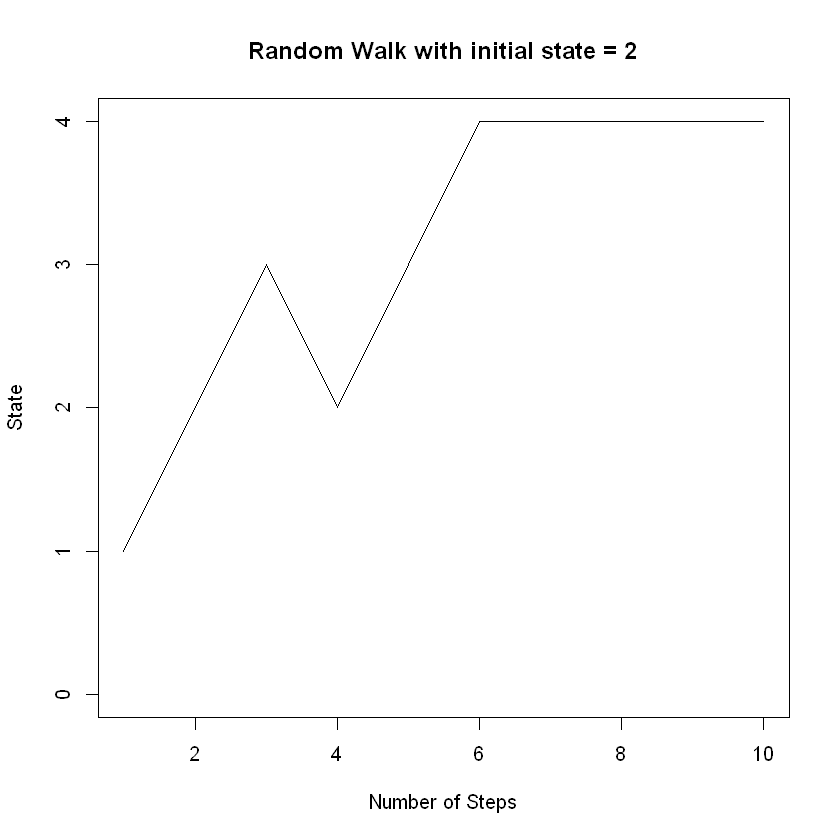

In [14]:
# Run the 500 simulations
rand_walks = matrix(0,10,500)
for(k in 1:500){
    rand_walks[,k] = Sim_Markov(10,Ini_prob,P_mat,2)
}

# test plot 1 random walk
steps = 1:10
plot(steps,rand_walks[,1]-1,type = 'l',ylim=c(0,4),ylab="State",xlab="Number of Steps",main="Random Walk with initial state = 2",)


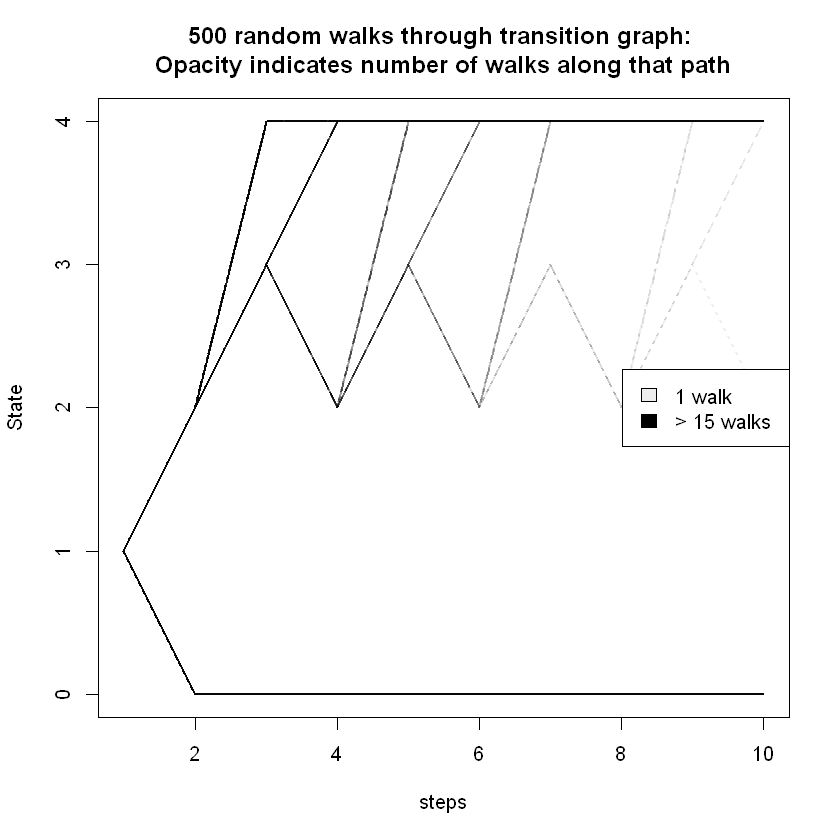

In [17]:
##plot the 500 simulations
library(scales)
matplot(steps,rand_walks-1,type = "l",col = alpha("black",0.07),lwd = 2,ylab = "State",main = "500 random walks through transition graph: \nOpacity indicates number of walks along that path")
legend("right",c("1 walk","> 15 walks"),fill = c(alpha("black",0.07),"black"))

In [16]:
###Create table of frequencies
final_state = rand_walks[10,]
freq_table = data.frame(matrix(0,6,3))
colnames(freq_table) = c("State","Count","Frequency")
freq_table$State = c("1","2","3","4","5","Total")
for(k in 1:5){
    freq_table$Count[k] = sum(final_state == k)
}
freq_table$Count[6] = sum(freq_table$Count[1:5])
freq_table$Frequency = freq_table$Count/500
freq_table

State,Count,Frequency
1,251,0.502
2,0,0.000
3,1,0.002
4,0,0.000
5,248,0.496
Total,500,1.000


## Bonus 1 optional
### From the Cleveland Heart Disease dataset:

<br>
<font color=blue>
1. calculate the mean and variance for the maximum heart rate achive during the exercise test, <br>
2. then generate 10000 boostraps and calculate the average mean, variance and 95% Confidence interval for each of the bootstraps samples. <br>
3. Produce density plots of the mean bootstraps.<br> 
4. In one of two sentences write an overall conclusion of applying the bootstrap to increase the precision to this dataset.<br></font>

For the max heart rate achieved the mean is 149.607261 bpm; variance is 523.265775 bpm; 
and standard deviation is 22.875003 bpm

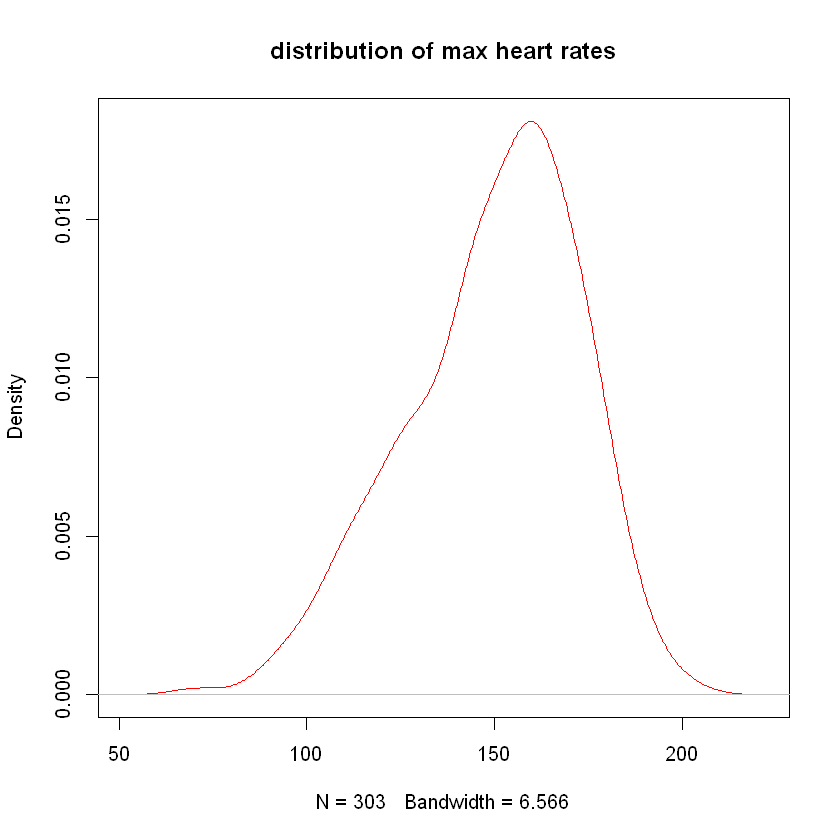

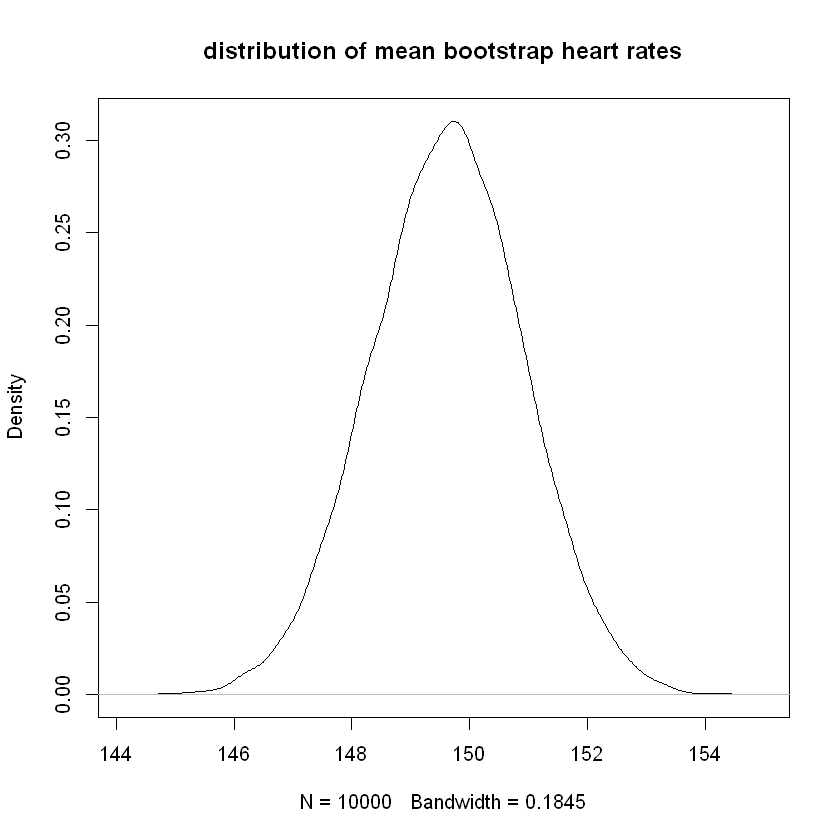

In [48]:
# 1
max_hr = cleveland$thalach
mean_hr = mean(max_hr)
var_hr = var(max_hr)
stddev_hr = sd(max_hr)
cat(sprintf("For the max heart rate achieved the mean is %f bpm; variance is %f bpm; \nand standard deviation is %f bpm",mean_hr,var_hr,stddev_hr))
# 2 
library(mosaic)
bootstrap_hr = matrix(0,303,10000)
bootstrap_hr_CI = matrix(0,10000,2)
bootstrap_hr_mean = matrix(0,1,10000)
bootstrap_hr_var = matrix(0,1,10000)
for(k in 1:10000){
    bootstrap_hr[,k] = resample(max_hr)
    bootstrap_hr_mean[k] = mean(bootstrap_hr[,k])
    bootstrap_hr_var[k] = var(bootstrap_hr[,k])
    bootstrap_hr_CI[k,1] = quantile(bootstrap_hr[,k],0.025)
    bootstrap_hr_CI[k,2] = quantile(bootstrap_hr[,k],0.975)
    }
# 3
dist_bootstrap_mean = density(bootstrap_hr_mean)
dist_original_hr = density(max_hr)
plot(dist_original_hr,col="red",main = "distribution of max heart rates")
plot(dist_bootstrap_mean, main = "distribution of mean bootstrap heart rates")

Applying bootstrap allows augmentation of the dataset to increase its size and thus increase the precision of inferential statistics calculated from the dataset such as the mean. Looking at the distribution of bootstrap means compared to the original the range is significantly narrowed and focused towards the mean, which is the same as the original mean. This allows a higher certainty of the true mean of the dataset.

### Bonus 2 optional. 
### From the Cleveland Heart Disease dataset: 
<br>
<font color=blue>
Generate a bayes network using all 14 available variables. In no more than 250 words write a summary of the main conclusions of your network. <br>

Generate conditional probabilities and Relative Risk calculations of 5 dependencies that you think are fundamental given the Belief network generated. (Remember that you can generate conditional probabilities with more than one variable and at different states)<br></font>